In [2]:
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.utils import to_categorical
import matplotlib.pyplot as plt

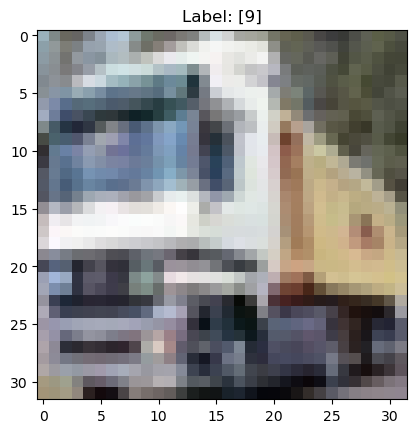

In [6]:
# https://www.kaggle.com/code/lianghsunhuang/dnn-cnn
from tensorflow.keras import datasets, layers, models


# 加載數據
# (x_train, y_train), (x_test, y_test) = mnist.load_data()
# (x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

plt.imshow(x_train[1])
plt.title(f'Label: {y_train[1]}')
plt.show()

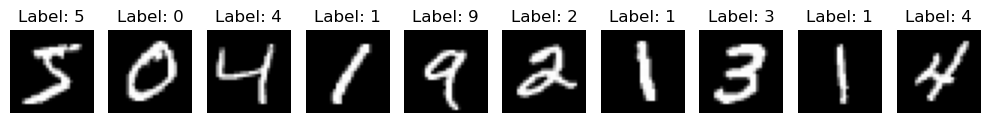

In [5]:
# 使用 matplotlib 顯示多張 MNIST 圖像

# 設置圖像數量
num_images = 10

# 創建一個圖形和一組子圖
fig, axes = plt.subplots(1, num_images, figsize=(10, 10))

for i, ax in enumerate(axes):
    # 顯示第 i 張圖像
    ax.imshow(x_train[i], cmap='gray')
    ax.set_title(f'Label: {y_train[i]}')
    ax.axis('off')  # 不顯示軸

plt.tight_layout()
plt.show()

In [6]:
x_train.shape

(60000, 28, 28)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [51]:
# 加載 CIFAR-10 數據集
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# 正規化數據
# x_train = x_train[:100] / 255
# x_test = x_test[:100] 
x_train = x_train[:1000]/ 255
y_train = y_train[:1000]

x_test = x_test[:1000]/ 255
y_test = y_test[:1000]
print(x_train.shape)
# x_train = x_train.reshape((x_train.shape[0], 28, 28, 1)).astype('int8') / 255
# x_test = x_test.reshape((x_test.shape[0], 28, 28, 1)).astype('int8') / 255

# 將標籤轉換為 one-hot 編碼
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

(1000, 32, 32, 3)


In [52]:
# 創建數據增強的生成器實例
datagen = ImageDataGenerator(
    rotation_range=15,      # 隨機旋轉的度數範圍
    width_shift_range=0.1,  # 水平平移的範圍
    height_shift_range=0.1, # 垂直平移的範圍
    horizontal_flip=True,   # 隨機水平翻轉
    fill_mode='nearest'     # 填充新創建的像素的方法
)

In [53]:

model = Sequential()
# model.add(Lambda(lambda x: x / 255))
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
# model.add(Conv2D(16, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [54]:
# # # 建立一個簡單的 CNN 模型
# model = Sequential([
#     Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)),
#     Conv2D(32, (3, 3), activation='relu'),
#     MaxPooling2D(pool_size=(2, 2)),
#     Dropout(0.25),

#     Conv2D(64, (3, 3), padding='same', activation='relu'),
#     Conv2D(64, (3, 3), activation='relu'),
#     MaxPooling2D(pool_size=(2, 2)),
#     Dropout(0.25),

#     Flatten(),
#     Dense(512, activation='relu'),
#     Dropout(0.5),
#     Dense(10, activation='softmax')
# ])

# 編譯模型
model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])
# 第五步：訓練模型

In [55]:
# 使用數據增強進行訓練
batch_size = 64
epochs = 25

# history = model.fit(datagen.flow(x_train, y_train, batch_size=batch_size),
#                     steps_per_epoch=len(x_train) // batch_size,
#                     epochs=epochs,
#                     validation_data=(x_test, y_test),
#                     verbose=2)
history = model.fit(x_train, y_train, epochs=50, batch_size=64, validation_data=(x_test, y_test))


Epoch 1/50
16/16 [==============================] - 2s 90ms/step - loss: 2.2930 - accuracy: 0.1430 - val_loss: 2.2109 - val_accuracy: 0.1460
Epoch 2/50
16/16 [==============================] - 2s 95ms/step - loss: 2.0345 - accuracy: 0.2610 - val_loss: 1.9257 - val_accuracy: 0.3210
Epoch 3/50
16/16 [==============================] - 2s 121ms/step - loss: 1.7351 - accuracy: 0.3790 - val_loss: 1.8388 - val_accuracy: 0.3580
Epoch 4/50
16/16 [==============================] - 2s 104ms/step - loss: 1.6431 - accuracy: 0.4300 - val_loss: 1.7710 - val_accuracy: 0.3910
Epoch 5/50
16/16 [==============================] - 1s 73ms/step - loss: 1.4878 - accuracy: 0.4880 - val_loss: 1.7627 - val_accuracy: 0.3860
Epoch 6/50
16/16 [==============================] - 1s 72ms/step - loss: 1.3987 - accuracy: 0.5170 - val_loss: 1.8279 - val_accuracy: 0.3700
Epoch 7/50
16/16 [==============================] - 1s 79ms/step - loss: 1.3245 - accuracy: 0.5450 - val_loss: 1.7730 - val_accuracy: 0.4120
Epoch 8/50


In [56]:
x_train.shape[0]

1000

In [5]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# 處理數據
x_train = x_train[:100]
y_train = y_train[:100]

x_test = x_test[:100]
y_test = y_test[:100]
print(x_train.shape)

x_train = x_train.reshape((x_train.shape[0], 28, 28, 1)).astype('float32') / 255
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1)).astype('float32') / 255
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
print(x_train.shape)


(100, 28, 28)
(100, 28, 28, 1)


In [6]:
y_train

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 

In [7]:
# 建立模型
model = Sequential()
model.add(Conv2D(8, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(16, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(16, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(16, activation='relu'))
model.add(Dense(10, activation='softmax'))

# 編譯模型
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# 訓練模型
history = model.fit(x_train, y_train, epochs=50, batch_size=64, validation_data=(x_test, y_test))



Epoch 1/50
2/2 [==============================] - 3s 796ms/step - loss: 2.2814 - accuracy: 0.2400 - val_loss: 2.2735 - val_accuracy: 0.1900
Epoch 2/50
2/2 [==============================] - 0s 218ms/step - loss: 2.2529 - accuracy: 0.3000 - val_loss: 2.2560 - val_accuracy: 0.2300
Epoch 3/50
2/2 [==============================] - 0s 169ms/step - loss: 2.2317 - accuracy: 0.3100 - val_loss: 2.2431 - val_accuracy: 0.2400
Epoch 4/50
2/2 [==============================] - 0s 183ms/step - loss: 2.2095 - accuracy: 0.3600 - val_loss: 2.2317 - val_accuracy: 0.2900
Epoch 5/50
2/2 [==============================] - 0s 228ms/step - loss: 2.1878 - accuracy: 0.3600 - val_loss: 2.2218 - val_accuracy: 0.2900
Epoch 6/50
2/2 [==============================] - 0s 150ms/step - loss: 2.1648 - accuracy: 0.3900 - val_loss: 2.2093 - val_accuracy: 0.2600
Epoch 7/50
2/2 [==============================] - 0s 218ms/step - loss: 2.1389 - accuracy: 0.3900 - val_loss: 2.1925 - val_accuracy: 0.2700
Epoch 8/50
2/2 [====

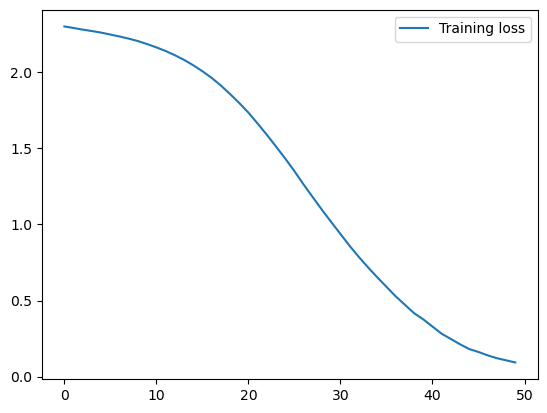

In [143]:
import matplotlib.pyplot as plt
# model.evaluate(x_test, y_test)
# loss = model.evaluate(x_test, y_test)
# print(1)
losss=history.history['loss']
# 繪製訓練歷史
plt.plot(losss, label='Training loss')
# plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()
plt.show()

In [144]:
from sklearn.metrics import confusion_matrix

y_pred = model.predict(x_train)

y_pred_label = np.argmax(y_pred, axis=1)

y_train_label = np.argmax(y_train, axis=1)

cm = confusion_matrix(y_train_label, y_pred_label)

# 打印混淆矩陣
print("Confusion Matrix:")
print(cm)

4/4 [==============================] - 0s 6ms/step
Confusion Matrix:
[[13  0  0  0  0  0  0  0  0  0]
 [ 0 14  0  0  0  0  0  0  0  0]
 [ 0  0  6  0  0  0  0  0  0  0]
 [ 0  0  0 11  0  0  0  0  0  0]
 [ 0  0  0  0 11  0  0  0  0  0]
 [ 0  0  0  0  0  5  0  0  0  0]
 [ 0  0  0  0  0  0 11  0  0  0]
 [ 0  0  0  0  0  0  0 10  0  0]
 [ 0  0  0  0  0  0  0  0  8  0]
 [ 0  0  0  0  0  0  0  0  0 11]]


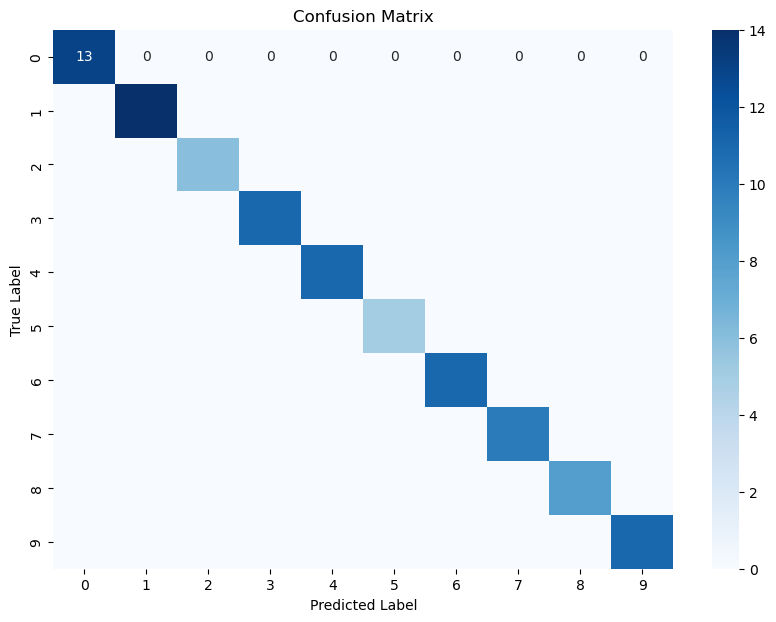

In [145]:
import matplotlib.pyplot as plt
import seaborn as sns

# 繪製混淆矩陣的熱圖
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

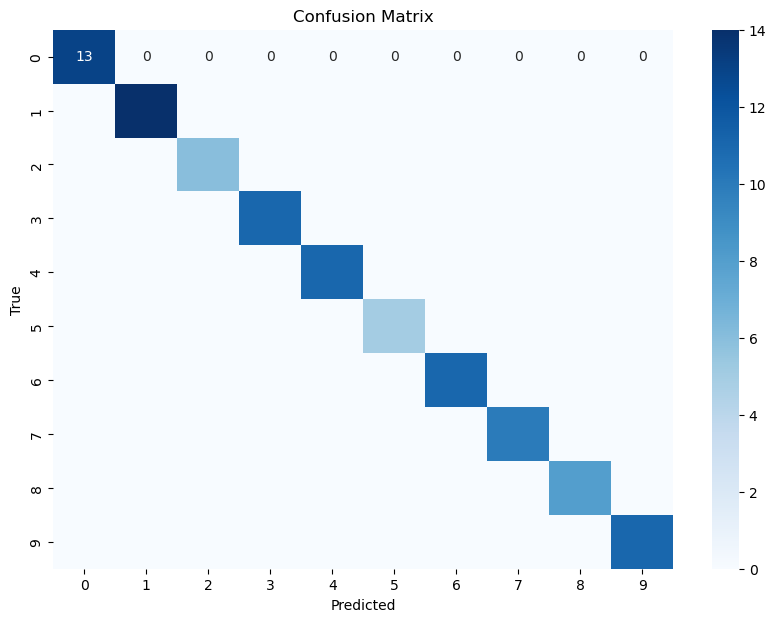

In [146]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import numpy as np

# 计算混淆矩阵
classes = np.unique(np.concatenate((y_train_label, y_pred_label)))
cm = confusion_matrix(y_train_label, y_pred_label, labels=classes)

# 使用seaborn绘制热力图
plt.figure(figsize=(10, 7))  # 可以调整大小
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)  # 'd' 表示十进制整数格式
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

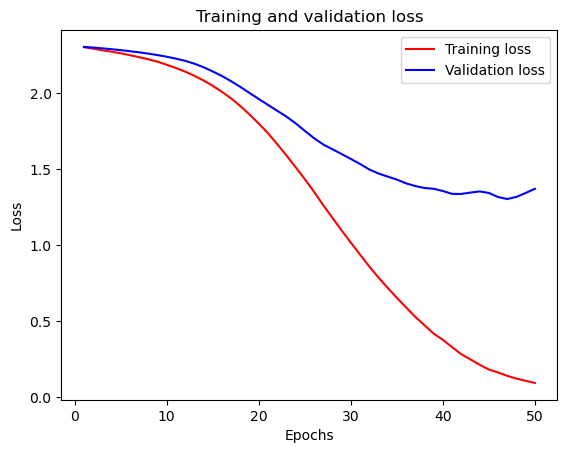

In [147]:
import matplotlib.pyplot as plt

train_loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(train_loss) + 1)

plt.plot(epochs, train_loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


In [149]:
# 評估模型
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)

4/4 [==============================] - 0s 8ms/step - loss: 1.3690 - accuracy: 0.7300
Test accuracy: 0.7300000190734863


In [150]:
len(x_test)

100

In [155]:
# 找出预测错误的索引
y_pred = model.predict(x_test)
y_pred_label = np.argmax(y_pred, axis=1)
y_test_label = np.argmax(y_test, axis=1)

len(x_test)
errors = np.where(y_pred_label != y_test_label)[0]
print(f'Total number of prediction errors: {len(errors)}')

4/4 [==============================] - 0s 10ms/step
Total number of prediction errors: 27


In [156]:
y_pred_label

array([7, 3, 1, 0, 4, 1, 4, 4, 5, 9, 0, 0, 9, 0, 1, 3, 4, 7, 3, 4, 9, 6,
       4, 6, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 2, 2, 7, 1, 2, 1, 1, 7, 4, 6,
       3, 6, 3, 4, 4, 4, 6, 3, 4, 3, 4, 0, 4, 1, 4, 5, 7, 8, 4, 3, 7, 4,
       4, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 7, 9, 7, 9, 6, 2, 9, 8, 4, 7, 3,
       4, 1, 3, 6, 4, 3, 1, 4, 3, 3, 0, 4], dtype=int64)

In [157]:
y_test_label

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6,
       6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2,
       3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4,
       6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3,
       6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9], dtype=int64)

In [159]:
errors = np.where(y_pred_label != y_test_label)



(array([ 1,  7, 11, 15, 16, 22, 23, 34, 43, 45, 46, 47, 52, 53, 54, 58, 62,
        66, 77, 80, 83, 88, 92, 96, 97, 98, 99], dtype=int64),)